# **Exercícios - Inteligência Computacional 2022/02 - Algoritmo SVM**

**Docente: Nádia Félix**

**Discente: André Martins**









Um amigo seu está namorando a 4 meses a Maria e deseja se casar
com ela, mas gostaria de saber se o casamento tem futuro. Complexo isso, não? Você então decide criar um classificador de divórcios (Oh my God!).

In [ ]:
# Álgebra Linear
import numpy as np
# Processamento de dados
import pandas as pd
# Visualização de dados 
import seaborn as sns
import matplotlib.pyplot as plt
# Algoritmos
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Processamento de dados

In [ ]:
# Carregando os dados
df = pd.read_csv('divorce.csv', delimiter=';')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
# Função para analisa o dataset
def load_info(data):
  print('\nThe shape of the dataset is:', data.shape)
  print('\nThe headof the dataset is:\n', data.head(5))
  print('\nThe column types are:\n', data.dtypes)  
  print('\nThe Describing of dataset is:\n',data.describe())
  print('\nThere are null values?\n', data.isnull().sum())

In [ ]:
# análise de data
load_info(df)


The shape of the dataset is: (170, 55)

The headof the dataset is:
    Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0     2     2     4     1     0     0     0     0     0      0  ...      2   
1     4     4     4     4     4     0     0     4     4      4  ...      2   
2     2     2     2     2     1     3     2     1     1      2  ...      3   
3     3     2     3     2     3     3     3     3     3      3  ...      2   
4     2     2     1     1     1     1     0     0     0      0  ...      2   

   Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  Class  
0      1      3      3      3      2      3      2      1      1  
1      2      3      4      4      4      4      2      2      1  
2      2      3      1      1      1      2      2      2      1  
3      2      3      3      3      3      2      2      2      1  
4      1      2      3      2      2      2      1      0      1  

[5 rows x 55 columns]

The column types are:
 Atr1     int6

In [66]:
# Normalizando o conjunto de dados
x = df.values[:,0:54]
y = df.values[:,54]
std_dev = np.std(x,axis = 0)
mean = np.mean(x,axis = 0)
x = x-mean/std_dev
std_dev.shape

(54,)

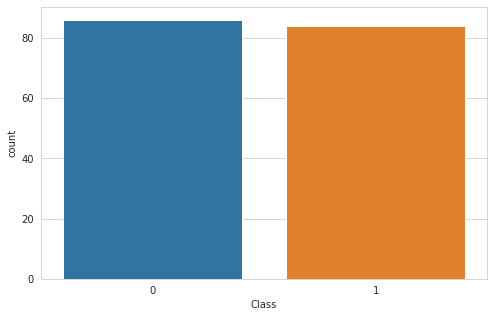

In [67]:
# Plot de Casal divorciado e casal casado (0 significa não, 1 - sim)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Class",data=df)

([<matplotlib.patches.Wedge at 0x7fb8636cfe10>,
 [Text(0.02587059645603526, -1.3997609482475961, '0'),
  Text(-0.020696582008890525, 1.1198087566603279, '1')],
 [Text(0.016631097721736952, -0.8998463238734544, '51%'),
  Text(-0.011457036469207255, 0.6198941331512529, '49%')])

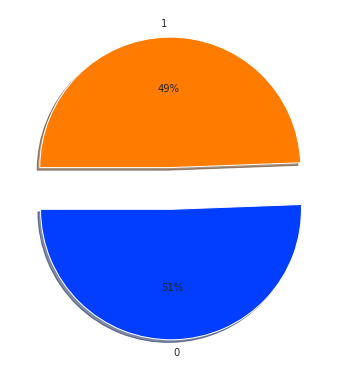

In [68]:
# Plot de Casal divorciado e casal casado em porcentagem
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(df['Class'].value_counts(), colors=colors, labels=[0,1], autopct='%0.0f%%', shadow=True, explode=explode, startangle=180)

O tempo gasto com a esposa é especial para nós. As respostas estão em uma escala de 5 pontos (0 = Nunca, 1 = Raramente, 2 = Regular, 3 = Frequentemente, 4 = Sempre).

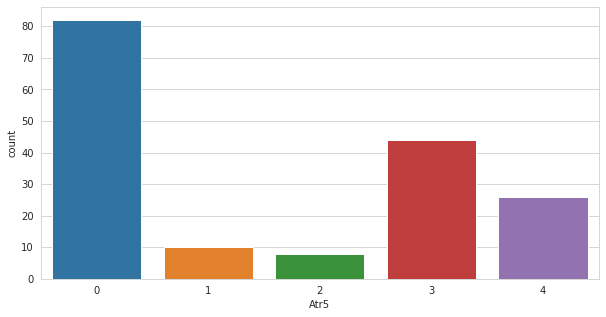

In [69]:
# O tempo que passei com minha esposa é especial para nós 
plt.figure(figsize=(10,5))
sns.countplot(x= "Atr5", data=df)

Não temos tempo em casa como parceiros. As respostas estão em uma escala de 5 pontos (0 = Nunca, 1 = Raramente, 2 = Regular, 3 = Frequentemente, 4 = Sempre).

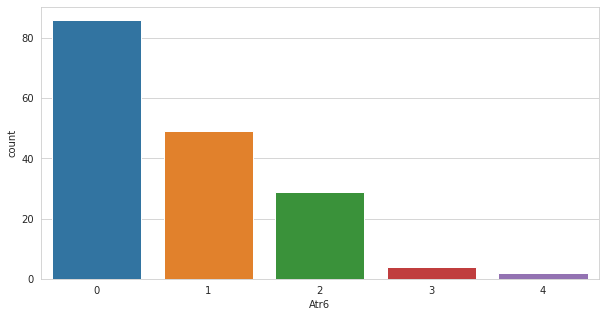

In [70]:
# Não temos tempo em casa como parceiros. 
plt.figure(figsize=(10,5))
sns.countplot(x= "Atr6",data=df)

In [71]:
# Matriz de correlação
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


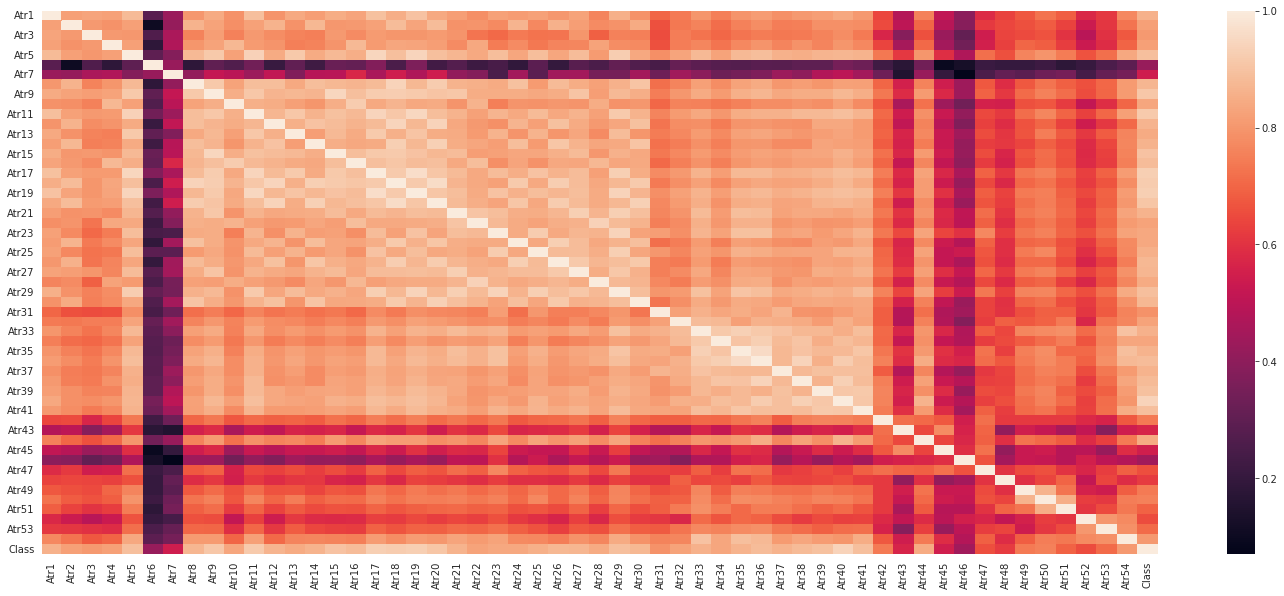

In [72]:
# Plot da matriz de correlação
plt.figure(figsize=(25,10))
sns.heatmap(df.corr())
plt.show()

In [73]:
# Separando a coluna alvo (Class)
x = df.drop('Class', axis=1)
y = df['Class']

In [61]:
# Dividindo o data set em duas partes (treino – 70% e teste – 30%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Teste utilizando o Kernel com **linear** e **RBF**

In [74]:
# Criando uma instância de SVM e ajustamos os dados.
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [75]:
for score in scores:
  print("Ajustando hiperparâmetros para %s" % score)
  print()

# Usando a função gridSearch para refinar os parâmetros
  clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
  clf.fit(x_train, y_train)

# Treinando um classificador SVM com kernel linear
# Precisão, Recall, F1 por classe
  print("Melhor conjunto de parâmetros encontrado no conjunto de treinamento: ")
  print()
  print(clf.best_params_)
  print()
  print("Pontuações do Grid no conjunto de treinamento: ")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
 
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
  print()
  print("Relatório de classificação detalhado: ")
  print()
  print("O modelo é treinado no conjunto de treinamento completo.")
  print("As pontuações são computadas no conjunto de avaliação completo.")
  print()
  y_true, y_pred = y_test, clf.predict(x_test)
  print(classification_report(y_true, y_pred))
  print()

Ajustando hiperparâmetros para precision

Melhor conjunto de parâmetros encontrado no conjunto de treinamento: 

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Pontuações do Grid no conjunto de treinamento: 

0.984 (+/-0.039) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1, 'kernel': 'linear'}
0.984 (+/-0.039) for {'C': 10, 'kernel': 'linear'}
0.984 (+/-0.039) for {'C': 100, 'kernel': 'linear'}
0.984 (+/-0.039) for {'C': 1000, 'kernel': 'linear'}

Relatório de classificação detalhado: 

O modelo é treinado no conju

# Teste utilizando o Kernel com **RBF** e **poly**

In [76]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [77]:
for score in scores:
  print("Ajustando hiperparâmetros para %s" % score)
  print()

# Usando a função gridSearch para refinar os parâmetros
  clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
  clf.fit(x_train, y_train)

# Treinando um classificador SVM com kernel linear
# Precisão, Recall, F1 por classe
  print("Melhor conjunto de parâmetros encontrado no conjunto de treinamento: ")
  print()
  print(clf.best_params_)
  print()
  print("Pontuações do Grid no conjunto de treinamento: ")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
 
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
  print()
  print("Relatório de classificação detalhado: ")
  print()
  print("O modelo é treinado no conjunto de treinamento completo.")
  print("As pontuações são computadas no conjunto de avaliação completo.")
  print()
  y_true, y_pred = y_test, clf.predict(x_test)
  print(classification_report(y_true, y_pred))
  print()

Ajustando hiperparâmetros para precision

Melhor conjunto de parâmetros encontrado no conjunto de treinamento: 

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Pontuações do Grid no conjunto de treinamento: 

0.984 (+/-0.039) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.039) for {'C': 1, 'kernel': 'poly'}
0.984 (+/-0.039) for {'C': 10, 'kernel': 'poly'}
0.984 (+/-0.039) for {'C': 100, 'kernel': 'poly'}
0.984 (+/-0.039) for {'C': 1000, 'kernel': 'poly'}

Relatório de classificação detalhado: 

O modelo é treinado no conjunto de t